In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("~/Downloads/AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [40]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Renewable", "Quarter", "Earth", "New", "S&P 100", "Iphone"]  
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [41]:
df = df.resample("Q").mean()
df = df.fillna(0)
X = df 
X = X[X.index.isin(y.index)]
y = y[y.index.isin(X.index)]


In [32]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [36]:
from sklearn.linear_model import Lasso

In [37]:
l = Lasso(alpha = 0.05)
l.fit(X_scaled, y)
Coefficients = l.coef_
Coefficients

array([ 0.01783666,  0.2870119 , -0.        , -0.00640514, -0.        ,
        0.15838766])

In [38]:
import matplotlib.pyplot as plt

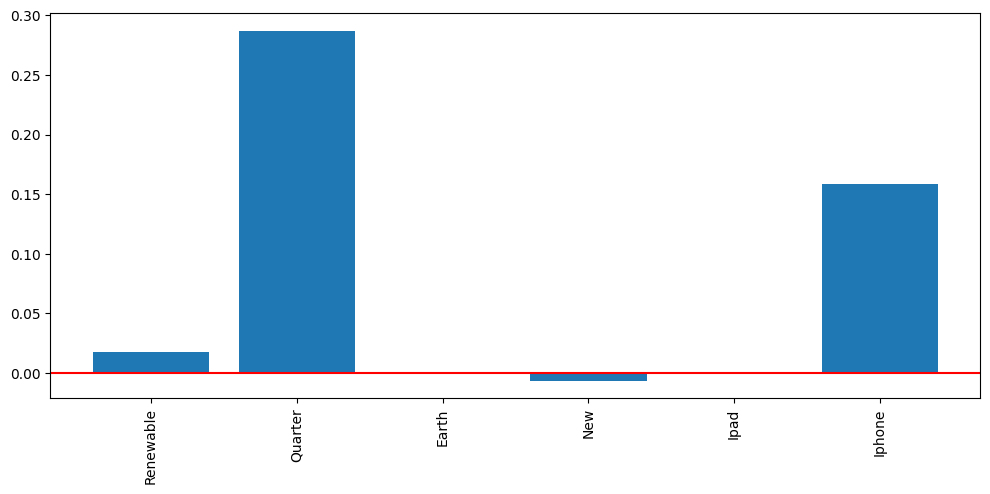

In [39]:
plt.figure(figsize = (12,5))
plt.bar(range(len(Coefficients)), Coefficients)
plt.xticks(range(len(Coefficients)), X.columns, rotation = 'vertical')
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The coefficients do make sense. Quarter and Iphone are positively correlated, this is understandable because Iphone sales are important to the financial documents which is dependent on the quarter. Renewable as now some of the products are moving towards the renewable source of production, but it is still less compared to what I had expected. 